# เทสๆๆ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house_df = pd.read_csv('USA_Housing.csv')

In [3]:
house_df.sample(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4631,60357.545030,7.239873,4.290194,2.33,36198.440991,9.347440e+05,"020 Joshua Summit\nKnightton, FM 59302"
2633,71105.291559,5.959945,7.778721,4.49,48457.021357,1.640186e+06,"595 Alyssa Ranch\nRachelport, FM 60462-6623"
3172,68297.518046,5.533759,8.257214,4.35,23177.581845,1.281308e+06,"8282 Diane Parks Suite 556\nPort Mary, CO 3436..."
286,69017.182800,5.777106,5.783613,3.11,55830.752836,1.446757e+06,"42822 Billy Lights\nTranchester, TX 45052"


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 253.9+ KB


In [5]:
house_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


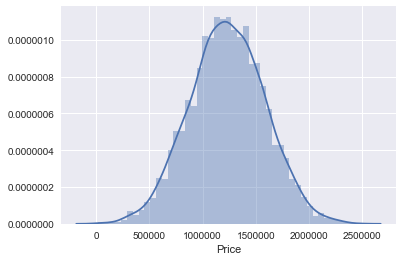

In [7]:
sns.distplot(house_df['Price'])

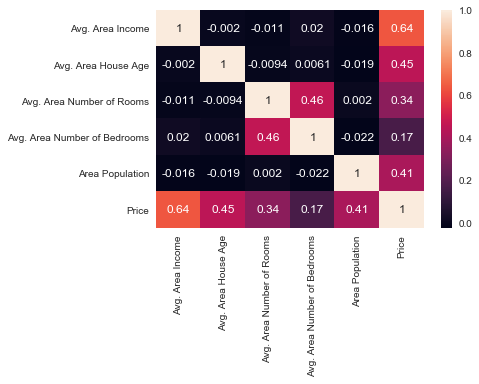

In [8]:
sns.heatmap(house_df.corr(), annot=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = house_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = house_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.598514
Avg. Area House Age,165641.393655
Avg. Area Number of Rooms,120514.980789
Avg. Area Number of Bedrooms,478.556603
Area Population,15.364537


In [15]:
pred = lm.predict(X_test)

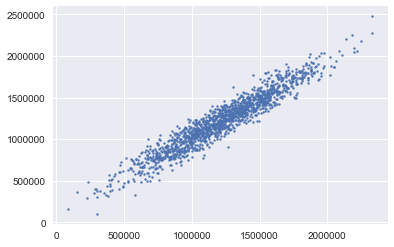

In [16]:
plt.scatter(y_test,pred, s=4) 

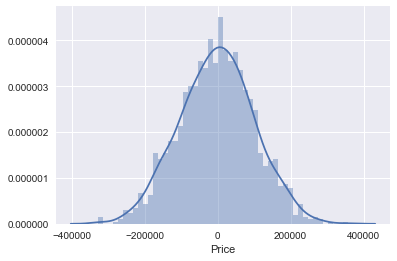

In [17]:
sns.distplot((y_test-pred),bins=50)

In [18]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 81349.240919
MSE: 10408992254.1
RMSE: 102024.468899


In [34]:
from sklearn.metrics import r2_score

In [43]:
print('R square: ',r2_score(y_test,pred))

R square:  0.91592757184
